In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


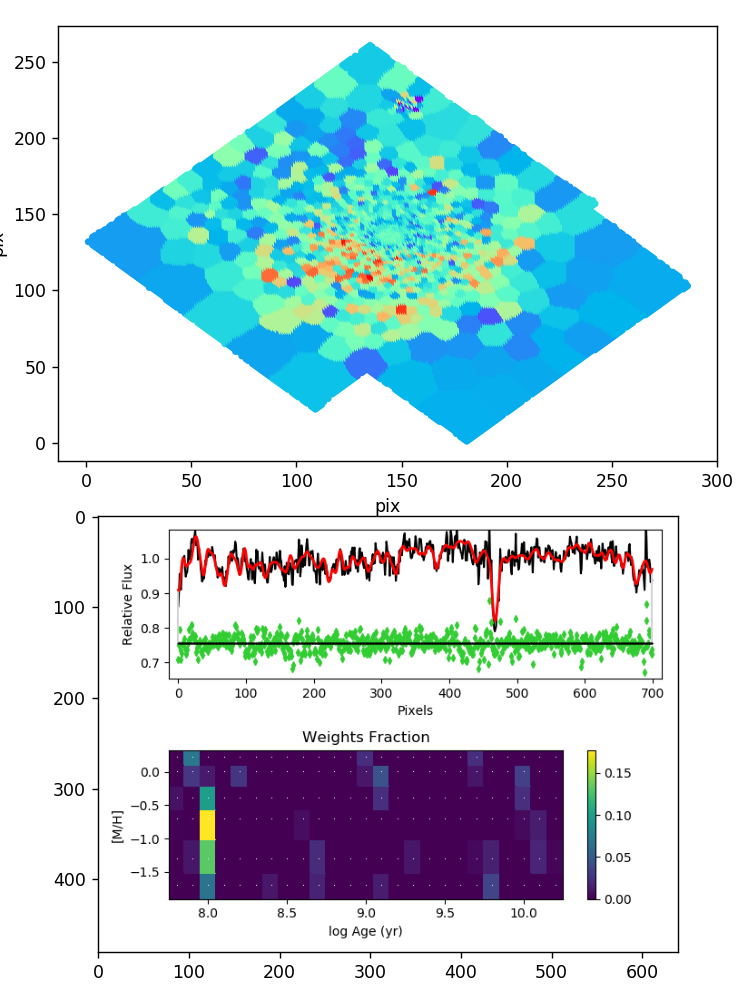

7

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox 
    
def hover(event):
    if cbar.contains(event)[0]:
        ind = cbar.contains(event)[1]["ind"][1]
        #print(ind)
        imcode = df_vor['bin'][ind]
        img = mpimg.imread('pop_fits/%i.png'%imcode)
        ax2.imshow(img)
    fig.canvas.draw_idle()


code = 'log_age'

df_vor = pd.read_csv('coords_w_solutions.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,8))
plt.tight_layout()
cbar = ax1.scatter(df_vor['x'], df_vor['y'], c = df_vor['%s'%code], marker='.', cmap='rainbow', vmin=7.9, vmax=10)
ax1.set_xlabel('pix')
ax1.set_ylabel('pix')

# add callback for mouse moves

fig.canvas.mpl_connect('button_press_event', hover)         

